In [1]:
import os; os.environ["https_proxy"] = "http://172.19.135.130:5000"
# export https_proxy=http://172.19.135.130:5000
# export http_proxy=http://172.19.135.130:5000

import tensorflow_datasets as tfds

ds = tfds.load("droid_100", data_dir=".", split="train")

2025-05-20 19:40:25.499390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747741225.520729   53358 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747741225.527773   53358 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747741225.544964   53358 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747741225.544977   53358 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747741225.544979   53358 computation_placer.cc:177] computation placer alr

In [8]:
ds

<_PrefetchDataset element_spec={'episode_metadata': {'file_path': TensorSpec(shape=(), dtype=tf.string, name=None), 'recording_folderpath': TensorSpec(shape=(), dtype=tf.string, name=None)}, 'steps': DatasetSpec({'action': TensorSpec(shape=(7,), dtype=tf.float64, name=None), 'action_dict': {'cartesian_position': TensorSpec(shape=(6,), dtype=tf.float64, name=None), 'cartesian_velocity': TensorSpec(shape=(6,), dtype=tf.float64, name=None), 'gripper_position': TensorSpec(shape=(1,), dtype=tf.float64, name=None), 'gripper_velocity': TensorSpec(shape=(1,), dtype=tf.float64, name=None), 'joint_position': TensorSpec(shape=(7,), dtype=tf.float64, name=None), 'joint_velocity': TensorSpec(shape=(7,), dtype=tf.float64, name=None)}, 'discount': TensorSpec(shape=(), dtype=tf.float32, name=None), 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'language_instruction': 

In [15]:
# for episode in ds:
#     break
episode = next(iter(ds))
step = next(iter(episode["steps"]))

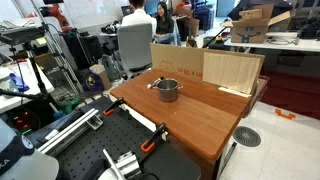

In [17]:
import PIL
PIL.Image.fromarray(step["observation"]["exterior_image_1_left"].numpy())

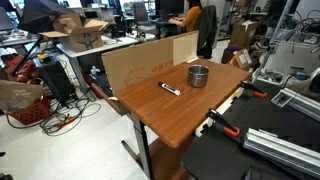

In [18]:
PIL.Image.fromarray(step["observation"]["exterior_image_2_left"].numpy())

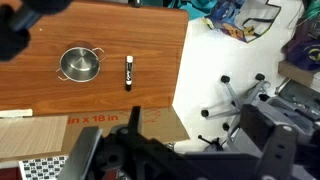

In [19]:
PIL.Image.fromarray(step["observation"]["wrist_image_left"].numpy())

In [20]:
step["observation"].keys()

dict_keys(['cartesian_position', 'exterior_image_1_left', 'exterior_image_2_left', 'gripper_position', 'joint_position', 'wrist_image_left'])

In [ ]:

images = []
for episode in ds.shuffle(10, seed=0).take(1):
  for i, step in enumerate(episode["steps"]):
    images.append(
      Image.fromarray(
        np.concatenate((
              step["observation"]["exterior_image_1_left"].numpy(),
              step["observation"]["exterior_image_2_left"].numpy(),
              step["observation"]["wrist_image_left"].numpy(),
        ), axis=1)
      )
    )
